In [1]:
import pandas as pd
import time
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from sklearn import linear_model
from sklearn import mixture
import kernelml
import seaborn
from scipy import stats
import re

In [2]:
import numpy
import scipy
import scipy.signal

from ipyparallel import Client
rc = Client(profile='default')
dview = rc[:]
dview.block = True

with dview.sync_imports():
    import numpy
    import scipy
    import scipy.signal

importing numpy on engine(s)
importing scipy on engine(s)
importing scipy.signal on engine(s)


In [4]:
def generate_MoG_data(num_data, means, covariances, weights):
    """ Creates a list of data points """
    num_clusters = len(weights)
    data = []
    for i in range(num_data):
        k = np.random.choice(len(weights), 1, p=weights)[0]
        x = np.random.multivariate_normal(means[k], covariances[k])
        data.append(x)
    return data


init_means = [
    [5, 0], # mean of cluster 1
    [1, 1], # mean of cluster 2
    [0, 5]  # mean of cluster 3
]

init_covariances = [
    [[.5, 0.], [0, .5]], # covariance of cluster 1
    [[.92, .38], [.38, .91]], # covariance of cluster 2
    [[.5, 0.], [0, .5]]  # covariance of cluster 3
]
init_weights = [1/4., 1/2., 1/4.]  # weights of each cluster



y = np.vstack(generate_MoG_data(1000, init_means, init_covariances, init_weights))
y = np.vstack([y,np.random.multivariate_normal(np.mean(y,axis=0),np.diag(np.var(y,axis=0)),size=50)])
y = y/np.linalg.norm(y,axis=0)

model = kernelml.hdr_estimator.HDRE(num_clusters=4, bins_per_dim=11, simulations=400, realizations=10,
                                    smoothing_parameter=2.0)

model.optimize(y,dview=dview)

stopped realization at cycle: 10
realization 0 loss 0.11292994395745411 time 9.609155893325806
stopped realization at cycle: 10
realization 1 loss 0.043783043672982705 time 7.720062971115112
stopped realization at cycle: 10
realization 2 loss 0.010389254373763042 time 7.4621288776397705
stopped realization at cycle: 10
realization 3 loss 0.0034201890554451863 time 7.505352020263672
stopped realization at cycle: 10
realization 4 loss 0.001941528474758826 time 7.449626922607422
stopped realization at cycle: 10
realization 5 loss 0.0014575745245457984 time 7.4176249504089355
stopped realization at cycle: 10
realization 6 loss 0.0013585663833779733 time 7.579728126525879
stopped realization at cycle: 10
realization 7 loss 0.0013079389350638521 time 7.495599031448364
stopped realization at cycle: 10
realization 8 loss 0.0013267466936924092 time 7.777237176895142
stopped realization at cycle: 10
realization 9 loss 0.0013257448027511225 time 7.93878698348999


In [25]:
hdr_assignments = model.predict(y,variance_pad=1.14)

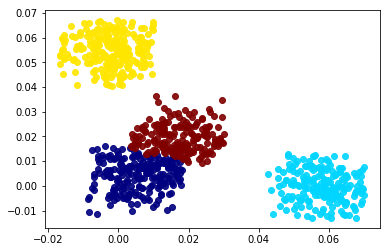

847


In [26]:
num_clusters = 4
colors = cm.jet(np.linspace(0,1, num_clusters))

for i in range(y.shape[1]):
    for j in range(y.shape[1]):
        if j>i:
            for k in range(num_clusters):
                plt.plot(y[hdr_assignments==k,i],y[hdr_assignments==k,j],'.',color=colors[k], markersize=12, alpha=0.9)
            plt.show()
print(np.sum(np.isnan(hdr_assignments)==False))

In [27]:
gmm = mixture.GaussianMixture(n_components=4,max_iter=10000,tol=0.001,covariance_type='tied').fit(y)
gmm_assignments = gmm.predict(y).astype(np.float)
log_prob_norm,log_prob = gmm._estimate_log_prob_resp(y)
mask = np.max(np.exp(log_prob),axis=1)<0.79
gmm_assignments[mask] = np.nan

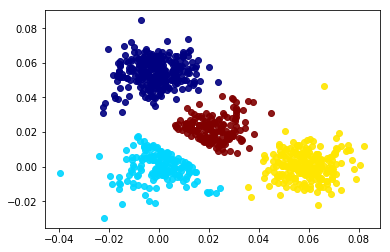

849


In [28]:
num_clusters = 4
colors = cm.jet(np.linspace(0,1, num_clusters))

for i in range(y.shape[1]):
    for j in range(y.shape[1]):
        if j>i:
            for k in range(num_clusters):
                plt.plot(y[gmm_assignments==k,i],y[gmm_assignments==k,j],'.',color=colors[k], markersize=12, alpha=0.9)
            plt.show()
print(np.sum(np.isnan(gmm_assignments)==False))